In [1]:
import numpy as np
import pandas as pd

import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import numpy as np
import pandas as pd

import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import nltk
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from ipywidgets import interact
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn import neighbors
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from bs4 import BeautifulSoup
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.optimize import minimize
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression as logr
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import roc_auc_score
from scipy import optimize
from scipy import integrate
from tabulate import tabulate
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn. decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, roc_auc_score, average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import precision_recall_curve

In [2]:
os.environ['OMP_NUM_THREADS'] = '1'

# Setup

In [2]:
data= pd.read_csv("abortion.csv")
data= data[['country', 'region','anc_4plus', 'upreg', 'upreg_no_cp', 'upreg_abortion_no_cp', 'curr_costs_cp_percap', 'curr_costs_prnc_percap', 'curr_abortion_pac_costs_percap', 'rate_matdeaths', 'sti_nocare', 'inneed_married', 'inneed_formerlymar', 'inneed_nevermar', 'wra']]

In [3]:
data['inneed']=(data['inneed_formerlymar']+data['inneed_nevermar']+data['inneed_married'])/data['wra']
data['upreg_std']=data['upreg_no_cp']/data['upreg']
data['upreg_abortion_std']=data['upreg_abortion_no_cp']/data['upreg']

In [4]:
file_path = 'C:/Users/gabri/Documents/Classes/YEAR 4/2nd quarter/Data/Final/data.csv'

In [5]:
data.to_csv(file_path, index=False)

OSError: Cannot save file into a non-existent directory: 'C:/Users/gabri/Documents/Classes/YEAR 4/2nd quarter/Data/Final'

In [ ]:
data.shape

(132, 18)

In [15]:
file_path_1 = 'C:ML/data_f.csv'

In [13]:
data_f = data.dropna(subset=['upreg'])

In [14]:
data_f.to_csv(file_path_1, index=False)

OSError: Cannot save file into a non-existent directory: 'C:/Users/gisellemiralles/Downloads/ML'

In [11]:
data_f.shape

(108, 18)

# Exhibit 1 - Regions Total WRA

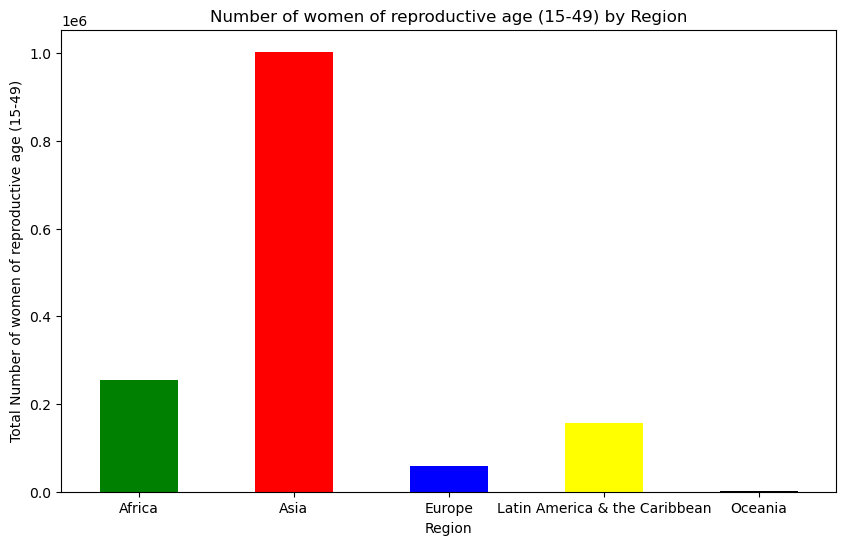

In [16]:
region_totals = data_f.groupby('region')['wra'].sum()
colors = ['green', 'red', 'blue', 'yellow', 'black']

# Plotting the histogram
plt.figure(figsize=(10, 6))
region_totals.plot(kind='bar', color=colors)
plt.xlabel('Region')
plt.ylabel('Total Number of women of reproductive age (15-49)')
plt.title('Number of women of reproductive age (15-49) by Region')
plt.xticks(rotation=0) 
plt.show()

# Exhibit 2 - Table

In [17]:
# Define variable names and their definitions
variables = [
    ['Variable', 'Definition'],
    ['Anc_4plus', 'Percent of women 15-49 with four or more ANC visits'],
    ['Upreg', 'Unintended pregnancies, total number'],
    ['Upreg_no_cp', 'Number of unintended pregnancies at no contraceptive care'],
    ['Upreg_abortion_no_cp', 'Number of abortions at no contraceptive care'],
    ['Upreg_std', 'Upreg_no_cp divided by Upreg'],
    ['Upreg_abortion_std', 'Upreg_abortion_no_cp divided by Upreg'],
    ['Curr_costs_cp_percap', 'Total contraceptive care costs per capita'],
    ['Curr_costs_prnc_percap', 'Total pregnancy-related and newborn care costs per capita'],
    ['Curr_abortion_pac_costs_percap', 'Total abortion-related care costs per capita'],
    ['Rate_matdeath', 'Total maternal deaths per 100,000 live births'],
    ['Sti_nocare', 'Number of women with one of the 4 curable STIs needing but not receiving care'],
    ['Inneed_married', 'Number wanting to avoid pregnancy, all married women'],
    ['Inneed_formerlymar', 'Number wanting to avoid pregnancy, formerly married women'],
    ['Inneed_nevermar', 'Number wanting to avoid pregnancy, never married women'],
    ['Inneed', 'The addition of Inneed_married, Inneed_formerlymar, Inneed_nevermar divided by wra'],
    ['Wra', 'Number of women of reproductive age, 15-49']
]

# Save the table as an image with better resolution and full space occupancy
plt.figure(figsize=(12, 4))
plt.axis('off')  # Turn off axis
plt.table(cellText=variables, loc='center', cellLoc='left', colWidths=[0.4, 0.58], fontsize=50)
plt.savefig('variable_definitions.png', dpi=1500, bbox_inches='tight', pad_inches=0.0)  # Save as image with higher resolution and less padding
plt.close()

# Print the table
print(tabulate(variables, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════════════════════╤════════════════════════════════════════════════════════════════════════════════════╕
│ Variable                       │ Definition                                                                         │
╞════════════════════════════════╪════════════════════════════════════════════════════════════════════════════════════╡
│ Anc_4plus                      │ Percent of women 15-49 with four or more ANC visits                                │
├────────────────────────────────┼────────────────────────────────────────────────────────────────────────────────────┤
│ Upreg                          │ Unintended pregnancies, total number                                               │
├────────────────────────────────┼────────────────────────────────────────────────────────────────────────────────────┤
│ Upreg_no_cp                    │ Number of unintended pregnancies at no contraceptive care                          │
├────────────────────────────────┼──────

# K-Means & PCA

# K-Means

## Preparing the data

In [18]:
################################
#  Rescaling (standardizing)   #
# since k-means uses distances #
################################

features_all =["anc_4plus", "upreg", "upreg_no_cp", "upreg_abortion_no_cp", "upreg_std", "upreg_abortion_std", "curr_costs_cp_percap", "curr_costs_prnc_percap", "curr_abortion_pac_costs_percap", "rate_matdeaths", "sti_nocare", "inneed_married", "inneed_formerlymar", "inneed_nevermar", "inneed", "wra"]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_f[features_all])

data_std = data_f.copy()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_std[features_all])

data_std.loc[:, features_all] = scaled_features

data_std

,country,region,anc_4plus,upreg,upreg_no_cp,upreg_abortion_no_cp,curr_costs_cp_percap,curr_costs_prnc_percap,curr_abortion_pac_costs_percap,rate_matdeaths,sti_nocare,inneed_married,inneed_formerlymar,inneed_nevermar,wra,inneed,upreg_std,upreg_abortion_std
1,Albania,Europe,0.359909,-0.296141,-0.211532,-0.185037,-1.004196,-0.576192,-1.514316,-0.862816,-0.325164,-0.238450,-0.362571,-0.234427,-0.270560,-0.716331,-1.257547,-0.781654
3,Angola,Africa,-0.521615,-0.014356,-0.149925,-0.161839,-0.558947,0.927284,0.485430,-0.007323,-0.021643,-0.170053,-0.136685,0.033532,-0.131695,-0.634219,-1.090574,-1.053302
4,Azerbaijan,Asia,-0.239399,-0.220631,-0.190602,-0.163768,-0.836234,0.621878,2.797462,-0.822677,-0.298598,-0.205065,-0.363373,-0.237710,-0.229726,-0.408662,-0.846026,-0.157774
5,Argentina,Latin America & the Caribbean,1.044698,-0.040282,-0.051325,-0.085011,3.341101,3.243930,1.858347,-0.772406,0.078263,-0.050325,-0.155133,0.464336,-0.049623,1.508575,0.709816,0.365625
6,Bangladesh,Asia,-2.148800,0.565084,0.271669,0.193422,0.295523,-1.082835,-0.182200,-0.266399,0.208413,0.795364,-0.097510,-0.226193,0.668425,1.134147,0.439147,0.602361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Tanzania,Africa,-1.027294,0.177577,-0.036429,-0.104076,-0.476976,-0.319566,-0.356097,1.061628,0.258938,-0.057606,0.691297,0.070467,-0.000004,0.097167,-0.418108,-0.644889
126,Burkina Faso,Africa,-1.766750,-0.179863,-0.172904,-0.164604,-0.686633,-0.663424,-0.647113,0.290886,-0.125409,-0.173723,-0.305161,-0.162404,-0.185866,-0.092684,-0.600197,-0.626261
127,Uzbekistan,Asia,0.724663,-0.214447,-0.132025,-0.102890,-0.747399,-0.434022,-0.730028,-0.810017,-0.215076,-0.074100,-0.256881,-0.233644,-0.099735,0.437692,2.140509,3.074010
129,Samoa,Oceania,0.130833,-0.298853,-0.211960,-0.185359,-0.429673,0.275445,1.348701,-0.755551,-0.333142,-0.246899,-0.365784,-0.243255,-0.283651,-0.695264,-0.970033,-0.487097


## The elbow method

In [19]:
#########################
# Find k - elbow method #
#########################

features =["anc_4plus", "upreg_std", "upreg_abortion_std", "curr_costs_cp_percap", "curr_costs_prnc_percap", "curr_abortion_pac_costs_percap", "rate_matdeaths", "sti_nocare", "inneed"]
kmeans_kwargs = {'init': 'random', 'n_init': 10, 
                 'max_iter': 300}

k_vals = list(range(2, 11))
sse = []
for k in k_vals:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_std[features])
    sse.append(kmeans.inertia_)
    
kl = KneeLocator(k_vals, sse, curve='convex', direction='decreasing')
print('Automatically found elbow at %d clusters.'%kl.elbow)

plt.plot(k_vals, sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')  
plt.scatter(kl.elbow, kl.elbow_y, s=150, c='#a8323e')

plt.savefig('elbow_plot.png', dpi=700, bbox_inches='tight')
plt.show()


NameError: name 'KneeLocator' is not defined

#  PCA

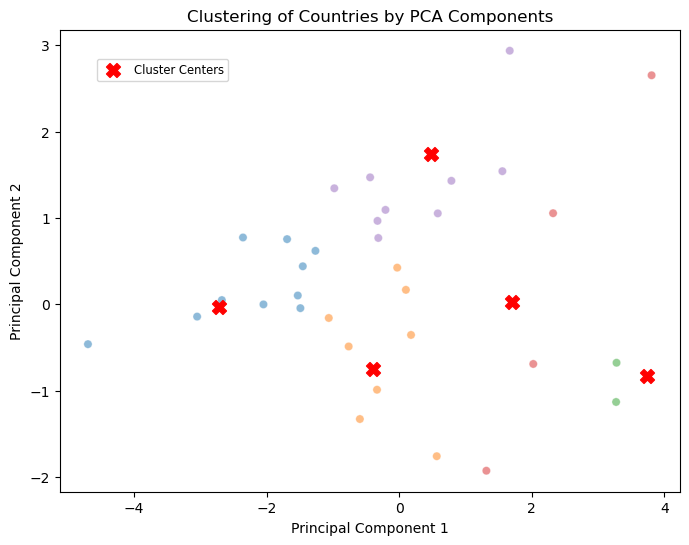

In [20]:
###################
# Train the model #
###################

features =["anc_4plus", "upreg_std", "upreg_abortion_std", "curr_costs_cp_percap", "curr_costs_prnc_percap", "curr_abortion_pac_costs_percap", "rate_matdeaths", "sti_nocare", "inneed"]
n_clusters =5
X_train, X_test, Y_train, Y_test = train_test_split(data_std[features], data_std["region"], test_size=0.3, random_state=3)


# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)  # You can adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)

# Train the KMeans model on the PCA-transformed training set
kmeans = KMeans(init='random', n_clusters=n_clusters, n_init=10, max_iter=500)
kmeans.fit(X_train_pca)

# Predict clusters on the testing set using PCA-transformed data
X_test_pca = pca.transform(X_test)
test_labels = kmeans.predict(X_test_pca)

# Plot clusters in the PCA-transformed space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=test_labels, palette='tab10', legend=None, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=100, c='red', label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering of Countries by PCA Components')
plt.legend(loc='upper left', bbox_to_anchor=(0.05, 0.95), fontsize='small')
plt.savefig('clustering_plot.png', dpi=700, bbox_inches='tight')
plt.show()

In [21]:


print('The lowest SSE value found: %.3f'%kmeans.inertia_)
print('The number of iterations required to converge: %d'%kmeans.n_iter_)

regions = Y_train

ari = adjusted_rand_score(Y_test, test_labels)
ami = adjusted_mutual_info_score(Y_test, test_labels)

print("Adjusted Rand Index (ARI):", ari)
print("Adjusted Mutual Information (AMI):", ami)

The lowest SSE value found: 79.574
The number of iterations required to converge: 8
Adjusted Rand Index (ARI): 0.1903327701461838
Adjusted Mutual Information (AMI): 0.24122608408677595


## Clustering the principal components with `sklearn`

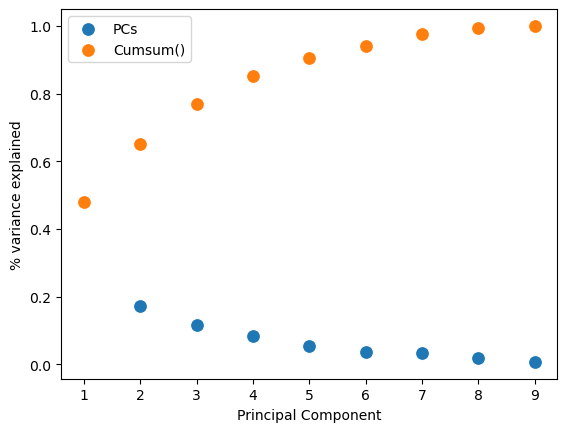

In [22]:
N = len(features)
model = PCA(n_components=N)
model.fit(data_std[features])

sns.scatterplot(x=range(1,N+1), y=model.explained_variance_ratio_, s=100) # % of variance explained by each PC
sns.scatterplot(x=range(1,N+1), y=model.explained_variance_ratio_.cumsum(), s=100)
plt.xlabel('Principal Component')
plt.ylabel('% variance explained')
plt.legend(['PCs', 'Cumsum()'])
model.explained_variance_ratio_.cumsum()
plt.savefig('variance_plot.png', dpi=700, bbox_inches='tight')


In [23]:
##################################
# K-means with the first two PCs #
##################################

model = PCA(n_components=5) # redundant now,  
model.fit(data_std[features])     # but good practice if inverse_transform is required
pcs_df = model.transform(data_std[features])
data_std['PC1'] = pcs_df[:,0]
data_std['PC2'] = pcs_df[:,1]
# df['PC3'] = pcs_df[:,2]
# df['PC4'] = pcs_df[:,3]
new_features = ['PC1', 'PC2']

#########################
# Find k - elbow method #
#########################

kmeans_kwargs = {'init': 'random', 'n_init': 10, 
                 'max_iter': 300}
sse = []
for k in k_vals:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_std[new_features])
    sse.append(kmeans.inertia_)
    
kl = KneeLocator(k_vals, sse, curve='convex', direction='decreasing')
print('Automatically found elbow at %d clusters.'%kl.elbow)

plt.plot(k_vals, sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')  
plt.scatter(kl.elbow, kl.elbow_y, s=150, c='#a8323e');
plt.savefig('elbow_plot.png', dpi=700, bbox_inches='tight')
plt.show()
plt.savefig('elbowPCA_plot.png', dpi=700, bbox_inches='tight')
plt.show()



NameError: name 'KneeLocator' is not defined

# Lasso

## Prepare data

In [24]:
X = data_std[features]

# Step 2: Preprocess the data
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Enconding Regions
data_std_mapped = data_std.copy()

region_mapping = {
    'Asia': 1,
    'Africa': 2,
    'Europe': 3,
    'Latin America & the Caribbean': 4,
    'Oceania': 5
}

# Replace region names with numerical values
data_std_mapped['region'] = data_std_mapped['region'].map(region_mapping)
Y = data_std_mapped["region"]

In [25]:
data_std

,country,region,anc_4plus,upreg,upreg_no_cp,upreg_abortion_no_cp,curr_costs_cp_percap,curr_costs_prnc_percap,curr_abortion_pac_costs_percap,rate_matdeaths,sti_nocare,inneed_married,inneed_formerlymar,inneed_nevermar,wra,inneed,upreg_std,upreg_abortion_std,PC1,PC2
1,Albania,Europe,0.359909,-0.296141,-0.211532,-0.185037,-1.004196,-0.576192,-1.514316,-0.862816,-0.325164,-0.238450,-0.362571,-0.234427,-0.270560,-0.716331,-1.257547,-0.781654,-1.612909,-0.232496
3,Angola,Africa,-0.521615,-0.014356,-0.149925,-0.161839,-0.558947,0.927284,0.485430,-0.007323,-0.021643,-0.170053,-0.136685,0.033532,-0.131695,-0.634219,-1.090574,-1.053302,-1.046214,-1.239421
4,Azerbaijan,Asia,-0.239399,-0.220631,-0.190602,-0.163768,-0.836234,0.621878,2.797462,-0.822677,-0.298598,-0.205065,-0.363373,-0.237710,-0.229726,-0.408662,-0.846026,-0.157774,0.152295,-1.521615
5,Argentina,Latin America & the Caribbean,1.044698,-0.040282,-0.051325,-0.085011,3.341101,3.243930,1.858347,-0.772406,0.078263,-0.050325,-0.155133,0.464336,-0.049623,1.508575,0.709816,0.365625,4.392807,-2.409791
6,Bangladesh,Asia,-2.148800,0.565084,0.271669,0.193422,0.295523,-1.082835,-0.182200,-0.266399,0.208413,0.795364,-0.097510,-0.226193,0.668425,1.134147,0.439147,0.602361,-0.038842,1.536391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Tanzania,Africa,-1.027294,0.177577,-0.036429,-0.104076,-0.476976,-0.319566,-0.356097,1.061628,0.258938,-0.057606,0.691297,0.070467,-0.000004,0.097167,-0.418108,-0.644889,-1.404002,0.360807
126,Burkina Faso,Africa,-1.766750,-0.179863,-0.172904,-0.164604,-0.686633,-0.663424,-0.647113,0.290886,-0.125409,-0.173723,-0.305161,-0.162404,-0.185866,-0.092684,-0.600197,-0.626261,-1.840561,0.473666
127,Uzbekistan,Asia,0.724663,-0.214447,-0.132025,-0.102890,-0.747399,-0.434022,-0.730028,-0.810017,-0.215076,-0.074100,-0.256881,-0.233644,-0.099735,0.437692,2.140509,3.074010,2.004252,2.394177
129,Samoa,Oceania,0.130833,-0.298853,-0.211960,-0.185359,-0.429673,0.275445,1.348701,-0.755551,-0.333142,-0.246899,-0.365784,-0.243255,-0.283651,-0.695264,-0.970033,-0.487097,-0.330581,-1.312978


## Training

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=3)

X_tr_pp = pd.DataFrame(scaler.transform(X_train), columns= features)
X_ts_pp = pd.DataFrame(scaler.transform(X_test), columns= features)

/Users/gisellemiralles/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/gisellemiralles/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Model

In [27]:
alphas = np.arange(-6, 3, 0.1)
alphas = np.power(10, alphas)

In [28]:
model_l = sklearn.linear_model.Lasso(alpha=1.0)
model_l.fit(X_tr_pp, Y_train)

Lasso()

In [29]:
model_lasso = sklearn.linear_model.LassoCV(alphas = alphas, cv = 5).fit(X_tr_pp, Y_train)

coefs_LASSO = pd.DataFrame (data = None, columns = features)

for i in range(0, len (alphas)):
    temp_model = sklearn. linear_model.LassoCV(alphas = [alphas [i]]).fit(X_tr_pp, Y_train)
    coefs_LASSO.loc [i] = temp_model.coef_
    
coefs_LASSO['alphas'] = np.log10(alphas)

coefs_LASSO_melt = pd.melt(coefs_LASSO, id_vars = 'alphas', var_name = 'Variable', value_name = 'Coefficient')


## Graph

In [30]:
lasso_plot = (p9.ggplot(coefs_LASSO_melt, p9.aes(x='alphas', y='Coefficient', color='Variable'))
 + p9.geom_line()
 + p9.scale_x_reverse()
 + p9.geom_vline(xintercept=np.log10(model_lasso.alpha_)))
lasso_plot

NameError: name 'p9' is not defined

## Accuracy

In [31]:
# Choose the alpha with the lowest RMSE
print("Best alpha:", np.log10(model_lasso.alpha_))

Best alpha: -1.6000000000000156


In [28]:
# Predict on the test set
y_pred_lasso = model_lasso.predict(X_test)

# Calculate RMSE for LASSO model
rmse_lasso = mean_squared_error(Y_test, y_pred_lasso, squared=False)
print("RMSE for LASSO model:", rmse_lasso)

RMSE for LASSO model: 1.1954376868269505


C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names


# Another Model - Logistic Regression

In [172]:
X = data_std[features]
Y = data_std["region"]
accuracies=[]
for i in range(30):

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=None)

    model_logistic = LogisticRegression(max_iter=1000)
    model_logistic.fit(X_train, Y_train)

    Y_pred = model_logistic.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    #print("Accuracy:", accuracy)

    #print("\nClassification Report:")
    #print(classification_report(Y_test, Y_pred))

    #print("\nConfusion Matrix:")
    #print(confusion_matrix(Y_test, Y_pred))
    accuracies.append(accuracy)
print(np.mean(accuracies))

0.9090909090909093


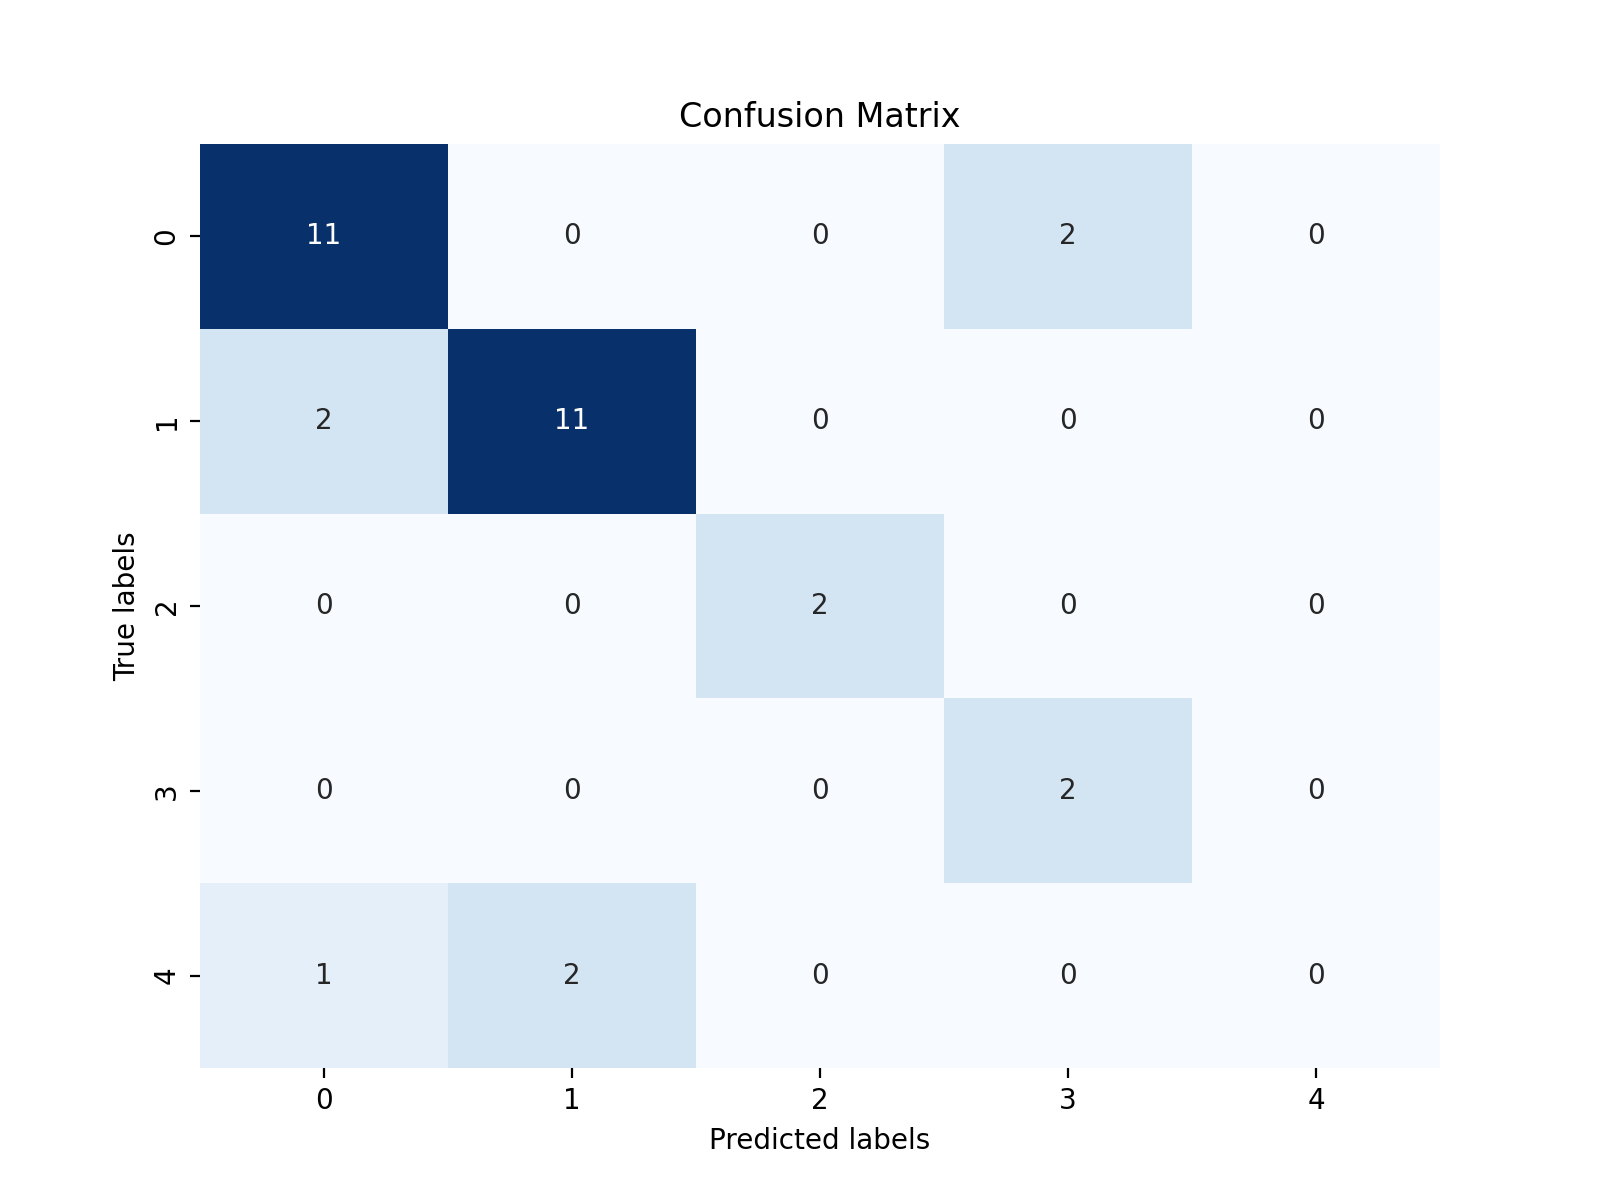

In [90]:
# 1. Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.savefig('confusion_matrix.png', dpi=700, bbox_inches='tight')
plt.show()


In [96]:
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

Classification Report:
                               precision    recall  f1-score   support

                       Africa       0.79      0.85      0.81        13
                         Asia       0.85      0.85      0.85        13
                       Europe       1.00      1.00      1.00         2
Latin America & the Caribbean       0.50      1.00      0.67         2
                      Oceania       0.00      0.00      0.00         3

                     accuracy                           0.79        33
                    macro avg       0.63      0.74      0.67        33
                 weighted avg       0.73      0.79      0.76        33



C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


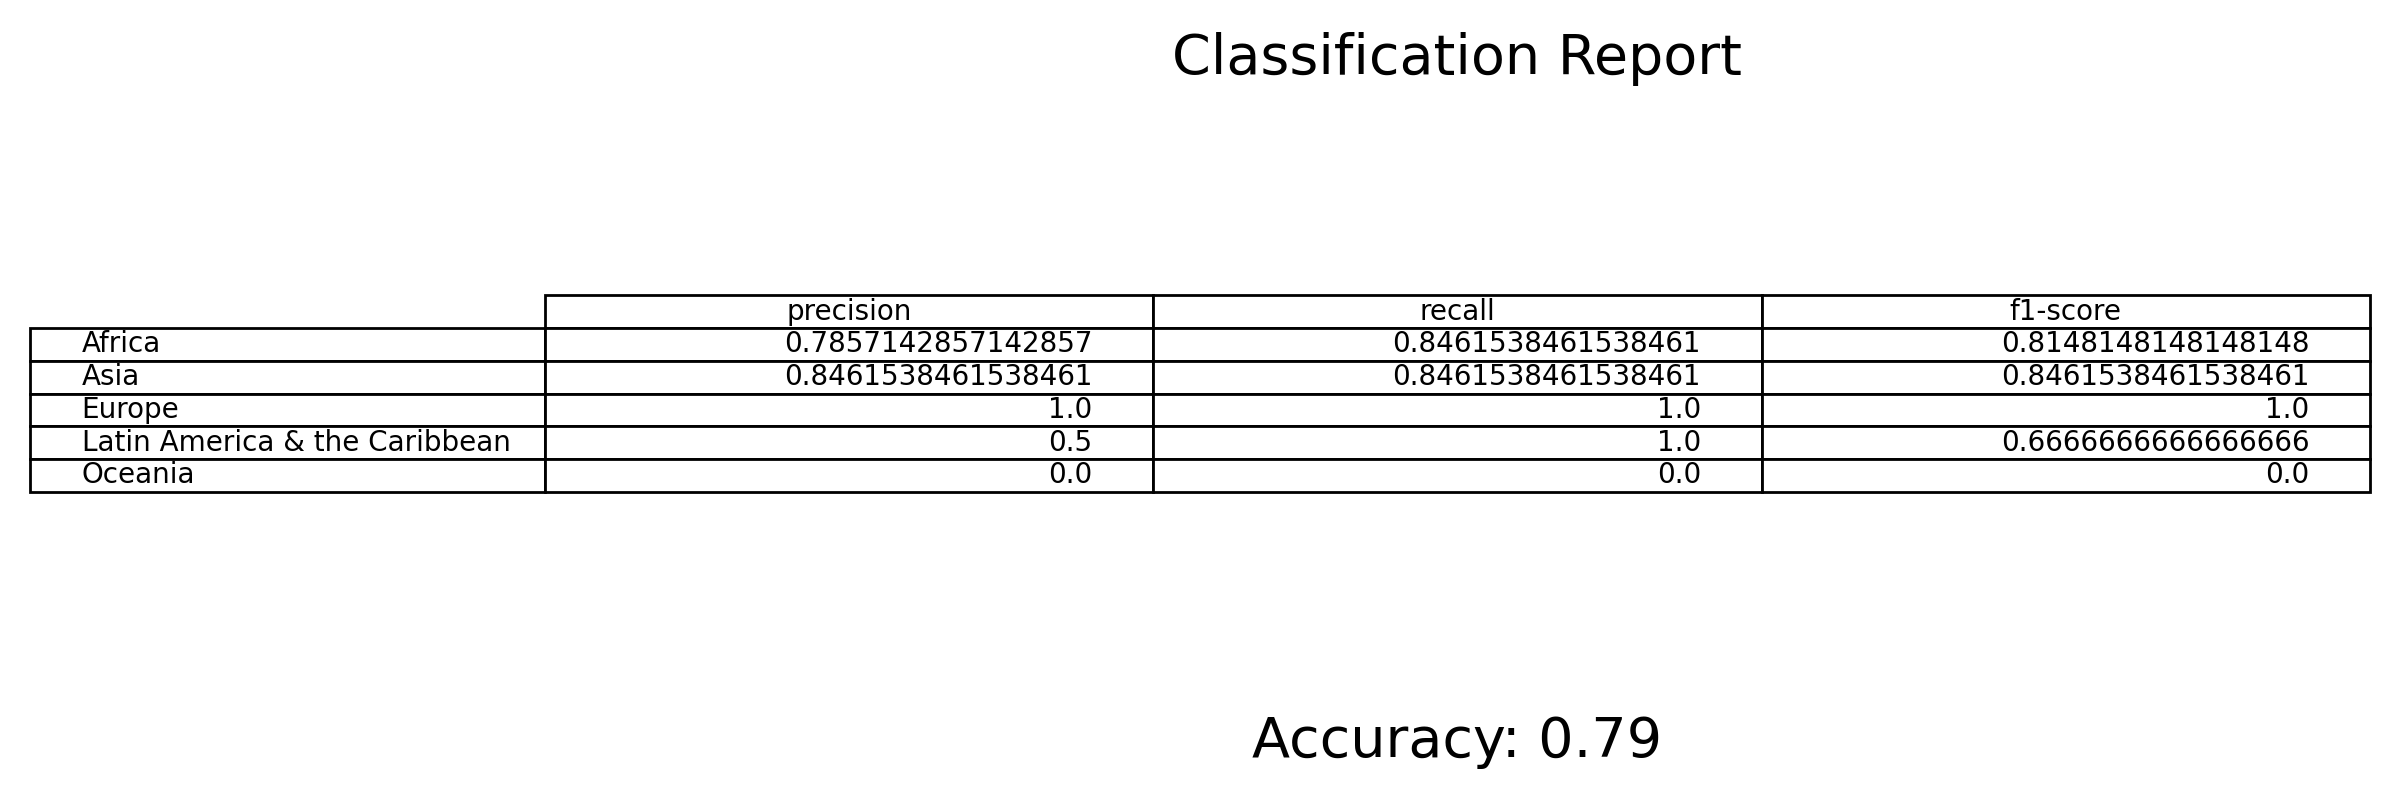

In [107]:

report_dict = classification_report(Y_test, Y_pred, output_dict=True)


report_df = pd.DataFrame(report_dict).transpose()


report_df.drop(columns='support', inplace=True)


report_df.drop(index=['macro avg', 'weighted avg','accuracy'], inplace=True)

# Save DataFrame as an image
plt.figure(figsize=(12, 4))
plt.axis('off')
plt.table(cellText=report_df.values,
          colLabels=report_df.columns,
          rowLabels=report_df.index,
          loc='center')
accuracy_value = report_dict['accuracy']
plt.text(0.5, -0.1, f'Accuracy: {accuracy_value:.2f}', ha='center', fontsize=20)
plt.title('Classification Report', fontsize=20)
plt.tight_layout()
plt.savefig('Classification_report.png', dpi=1500, bbox_inches='tight')
plt.show()

In [81]:
# Binarize the labels
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(Y_test)

# Compute ROC-AUC for each class
roc_auc = roc_auc_score(y_test_bin, y_pred_prob, average='macro')
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.9739316239316238


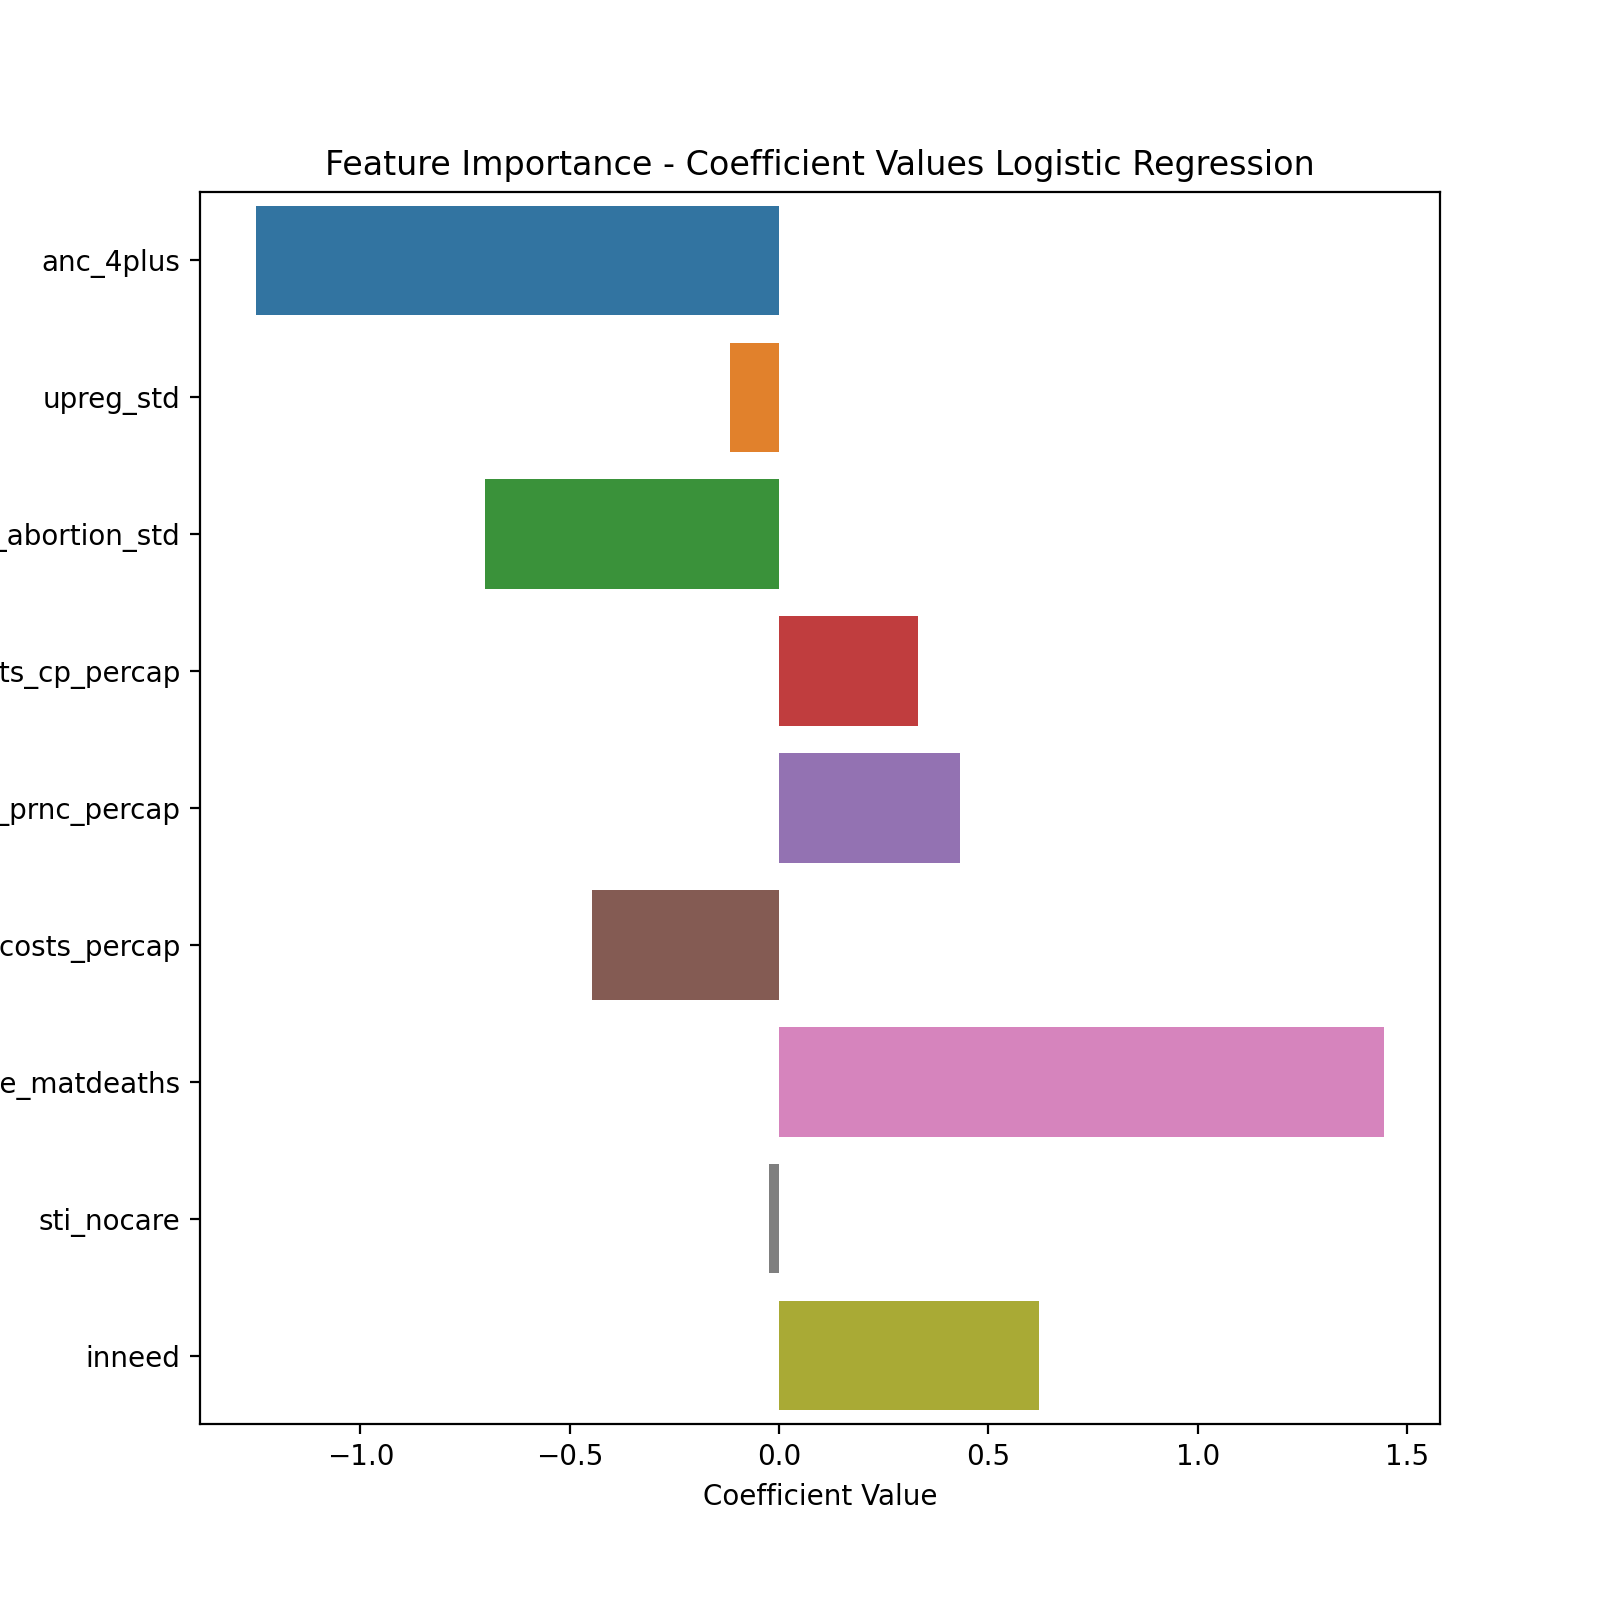

In [93]:

coefficients = model_logistic.coef_[0]

features = X.columns

plt.figure(figsize=(8, 8))
sns.barplot(x=coefficients, y=features)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance - Coefficient Values Logistic Regression')
plt.savefig('FeatureImportance_logistic.png', dpi=700, bbox_inches='tight')
plt.show()

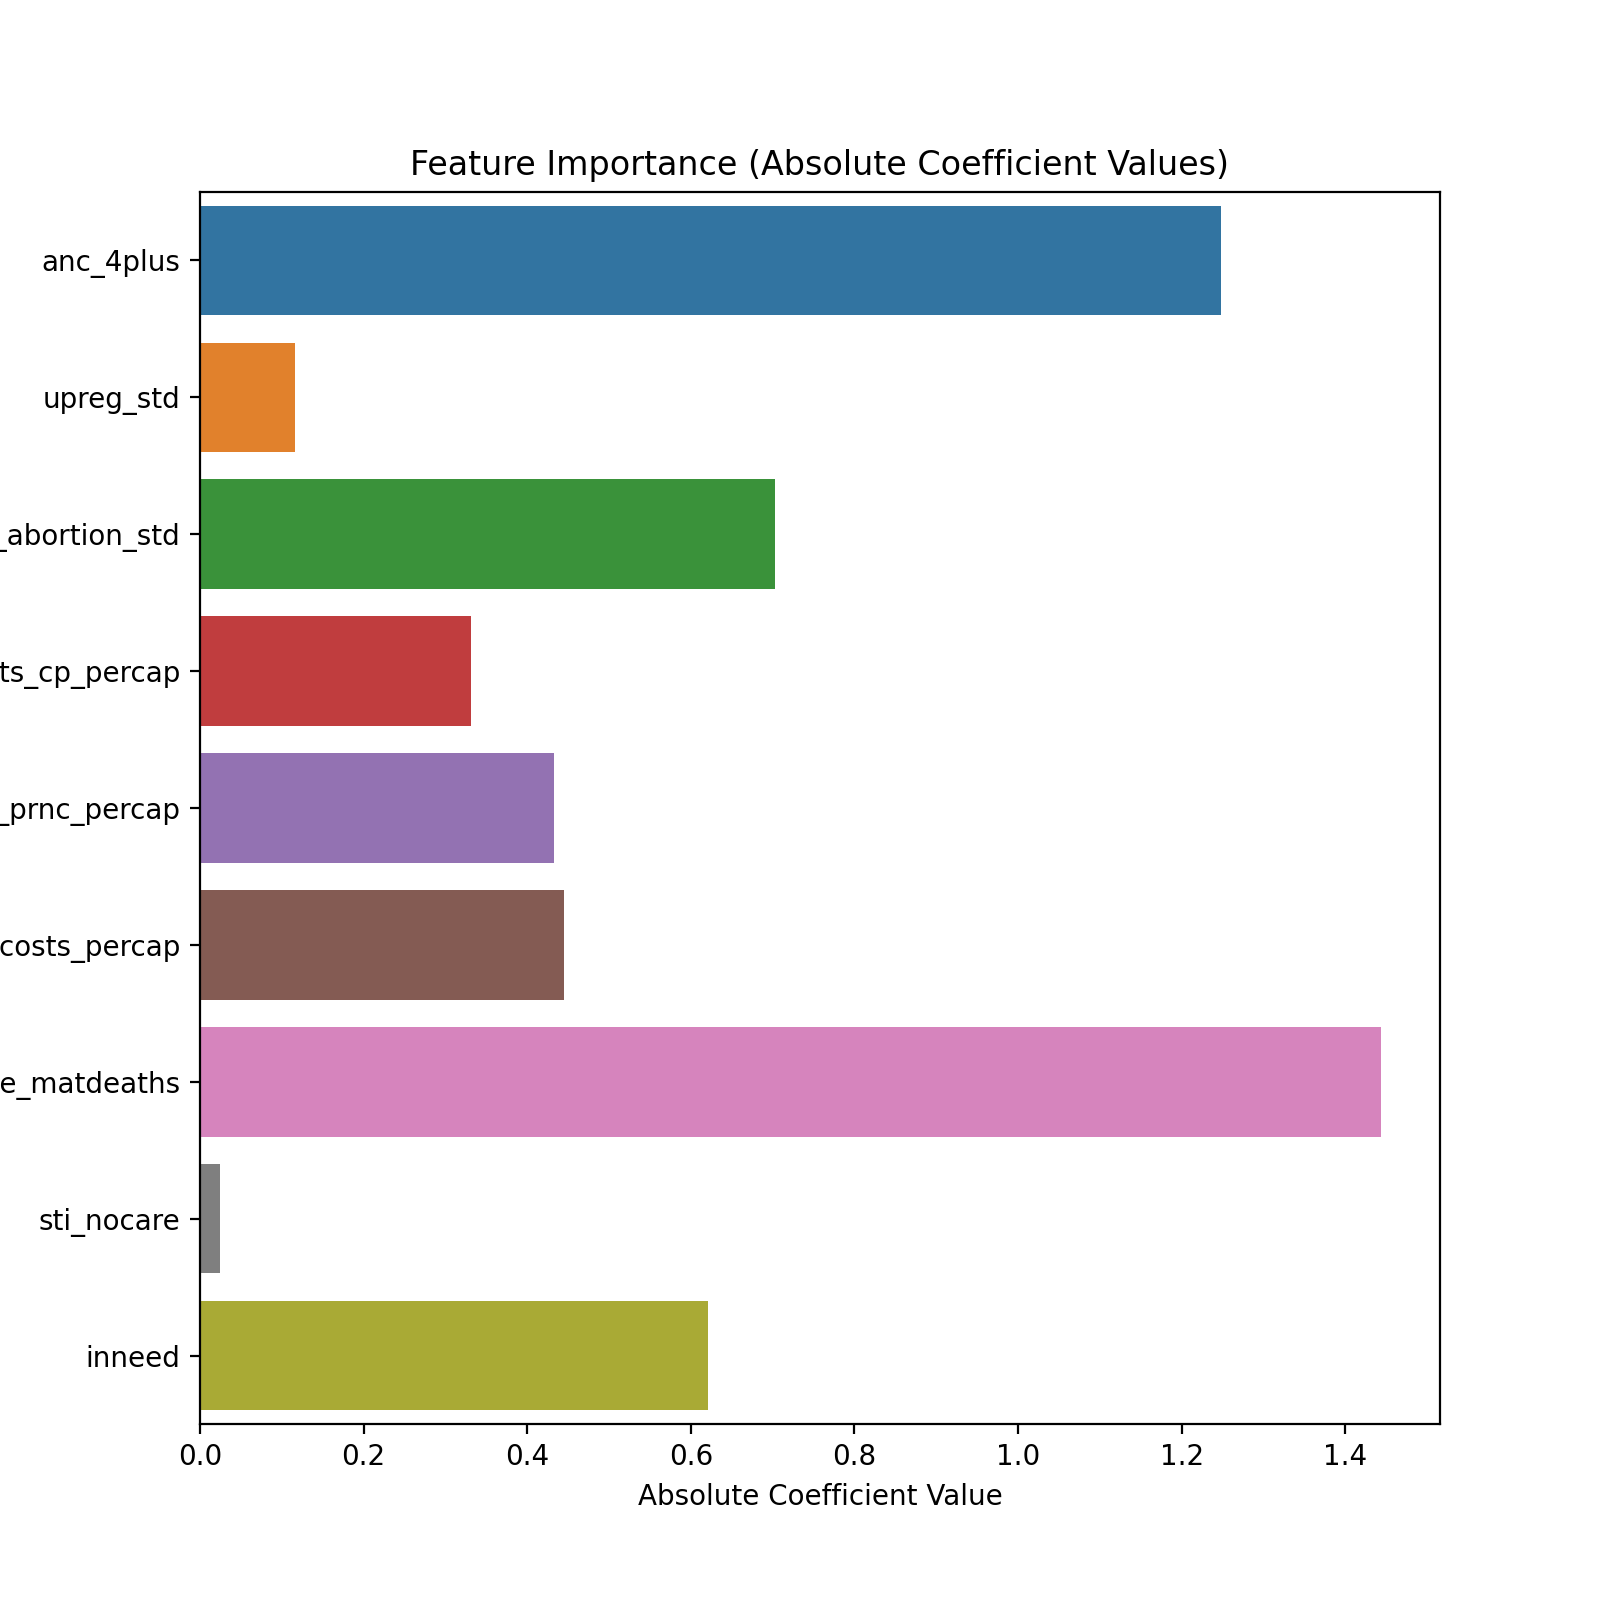

In [95]:

coefficients = model_logistic.coef_[0]

features = X.columns

plt.figure(figsize=(8, 8))
sns.barplot(x=np.abs(coefficients), y=features)
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance (Absolute Coefficient Values)')
plt.savefig('FeatureImportance_absolute__logistic.png', dpi=700, bbox_inches='tight')
plt.show()